In [172]:
import pandas as pd


fact_streak = '/Users/mattcollins/Projects/MyProject/KanjiProgram/csvs/fact_streak.csv'
df = pd.read_csv(fact_streak)
df

,index_word,streak,date,sample
0,1,8,04/08/2020,1
1,5,8,04/08/2020,1
2,16,8,04/08/2020,1
3,20,7,04/08/2020,1
4,39,8,04/08/2020,1
...,...,...,...,...
4188,548,3,25/12/2020,1
4189,551,3,25/12/2020,1
4190,552,4,25/12/2020,1
4191,553,4,25/12/2020,1


In [173]:
len(df[df['index_word'] == my_index])

NameError: name 'my_index' is not defined

In [174]:
def new_df(my_index):
    df2 = df[df['index_word'] == my_index].copy()
    df2['streak_prev'] = df2['streak'].shift(1)
    return df2


In [175]:
def find_decrease(df2, d):
    for index,row in df2.iterrows():
        if row['streak'] <= row['streak_prev']:
#             print(row['streak_prev'])
            newrow = row['index_word']
            d.append([newrow,row['streak_prev']])
    return d
        


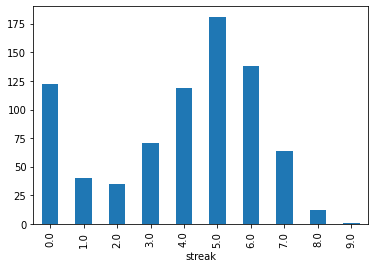

In [176]:
d = []
indexes = df.index_word.unique()

for i in indexes:
    if len(df[df['index_word'] == i]) > 8:
        df2 = new_df(i)
        d = find_decrease(df2, d)
    
df_new = pd.DataFrame (d,columns=['index_word','streak'])
grouped = df_new.groupby('streak').size()

grouped.plot(kind = 'bar')

In [169]:
boundaries = [0, 1, 2, 4, 7, 14, 14, 31]
